## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="dark")

## Data Loading and Cleaning

I use the sample function instead of head() or tail() to see if there are some null values in form of non-numerical characters in different parts of the dataset, so I can replace them later. Head and tail only allow us to see the first and last rows, respectively.

In [3]:
df = pd.read_csv("../raw_data/ML_cars.csv")
df.sample(frac=0.4)

car_ID  symboling                    CarName fueltype aspiration  \
69       70          0              buick century   diesel      turbo   
79       80          1              mitsubishi g4      gas      turbo   
119     120          1           plymouth cricket      gas      turbo   
43       44          0                 isuzu MU-X      gas        std   
191     192          0          volkswagen rabbit      gas        std   
..      ...        ...                        ...      ...        ...   
38       39          0           honda civic 1300      gas        std   
140     141          2                  subaru dl      gas        std   
120     121          1          plymouth fury iii      gas        std   
176     177         -1             toyota corolla      gas        std   
29       30          3  dodge coronet custom (sw)      gas      turbo   

    doornumber    carbody drivewheel enginelocation  wheelbase  ...  \
69         two    hardtop        rwd          front      106.7  ...   
79         two  hatchback        fwd          front       93.0  ...   
119        two  hatchback        fwd          front       93.7  ...   
43        four      sedan        rwd          front       94.3  ...   
191       four      sedan        fwd          front      100.4  ...   
..         ...        ...        ...            ...        ...  ...   
38         two  hatchback        fwd          front       96.5  ...   
140        two  hatchback        4wd          front       93.3  ...   
120       four  hatchback        fwd          front       93.7  ...   
176       four      sedan        fwd          front      102.4  ...   
29         two  hatchback        fwd          front       95.9  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
69          183         idi       3.58    3.64             21.5        123   
79           98        spdi       3.03    3.39              7.6        102   
119          98        spdi       3.03    3.39              7.6        102   
43          111        2bbl       3.31    3.23              8.5         78   
191         136        mpfi       3.19    3.40              8.5        110   
..          ...         ...        ...     ...              ...        ...   
38          110        1bbl       3.15    3.58              9.0         86   
140         108        2bbl       3.62    2.64              8.7         73   
120          90        2bbl       2.97    3.23              9.4         68   
176         122        mpfi       3.31    3.54              8.7         92   
29          156         mfi       3.60    3.90              7.0        145   

     peakrpm citympg  highwaympg    price  
69      4350      22          25  28176.0  
79      5500      24          30   7689.0  
119     5500      24          30   7957.0  
43      4800      24          29   6785.0  
191     5500      19          24  13295.0  
..       ...     ...         ...      ...  
38      5800      27          33   9095.0  
140     4400      26          31   7603.0  
120     5500      31          38   6229.0  
176     4200      27          32  10898.0  
29      5000      19          24  12964.0  

[82 rows x 26 columns]

## Checking Column Types, Null Values and Duplicates

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [130]:
df.isna().mean() # sum() would give the total amount of null values but mean() give us the proportion

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [5]:
df.drop_duplicates(inplace=True)

## Featuring Engineering and Classifying the cars

In [6]:
CarBrand = df["CarName"].str.split().str[0]
df.insert(2, "CarBrand", CarBrand)

In [7]:
df.CarBrand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
df.CarBrand.replace(to_replace="maxda", value="mazda", inplace=True)
df.CarBrand.replace(to_replace="Nissan", value="nissan", inplace=True)
df.CarBrand.replace(to_replace="porcshce", value="porsche", inplace=True)
df.CarBrand.replace(to_replace="toyouta", value="toyota", inplace=True)
df.CarBrand.replace(to_replace=["vokswagen", "vw"], value="volkswagen", inplace=True)

In [9]:
np.median(df["price"])

10295.0

In [10]:
df["Classification"] = ["Cheap" if np.median(df["price"]) > price else "Expensive" for price in df["price"]]
df.sample(n=5)

car_ID  symboling CarBrand                CarName fueltype aspiration  \
146     147          0   subaru          subaru trezia      gas        std   
51       52          1    mazda       maxda glc deluxe      gas        std   
57       58          3    mazda          mazda rx-7 gs      gas        std   
166     167          1   toyota  toyota corolla tercel      gas        std   
140     141          2   subaru              subaru dl      gas        std   

    doornumber    carbody drivewheel enginelocation  ...  fuelsystem  \
146       four      wagon        fwd          front  ...        2bbl   
51         two  hatchback        fwd          front  ...        2bbl   
57         two  hatchback        rwd          front  ...        4bbl   
166        two  hatchback        rwd          front  ...        mpfi   
140        two  hatchback        4wd          front  ...        2bbl   

     boreratio  stroke  compressionratio  horsepower peakrpm citympg  \
146       3.62   2.640               9.0          82    4800      28   
51        3.03   3.150               9.0          68    5000      31   
57        3.33   3.255               9.4         101    6000      17   
166       3.24   3.080               9.4         112    6600      26   
140       3.62   2.640               8.7          73    4400      26   

     highwaympg    price  Classification  
146          32   7463.0           Cheap  
51           38   6095.0           Cheap  
57           23  13645.0       Expensive  
166          29   9538.0           Cheap  
140          31   7603.0           Cheap  

[5 rows x 28 columns]

Car's ID is not going to be helpful, also there are hundreds of car models, so it's safe to eliminate this columns. We can use the CarBrand instead.

In [11]:
df.drop(columns=["car_ID", "CarName"], inplace=True)
df.head()

symboling     CarBrand fueltype aspiration doornumber      carbody  \
0          3  alfa-romero      gas        std        two  convertible   
1          3  alfa-romero      gas        std        two  convertible   
2          1  alfa-romero      gas        std        two    hatchback   
3          2         audi      gas        std       four        sedan   
4          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  ...  fuelsystem  boreratio  \
0        rwd          front       88.6      168.8  ...        mpfi       3.47   
1        rwd          front       88.6      168.8  ...        mpfi       3.47   
2        rwd          front       94.5      171.2  ...        mpfi       2.68   
3        fwd          front       99.8      176.6  ...        mpfi       3.19   
4        4wd          front       99.4      176.6  ...        mpfi       3.19   

   stroke compressionratio horsepower  peakrpm citympg  highwaympg    price  \
0    2.68              9.0        111     5000      21          27  13495.0   
1    2.68              9.0        111     5000      21          27  16500.0   
2    3.47              9.0        154     5000      19          26  16500.0   
3    3.40             10.0        102     5500      24          30  13950.0   
4    3.40              8.0        115     5500      18          22  17450.0   

   Classification  
0       Expensive  
1       Expensive  
2       Expensive  
3       Expensive  
4       Expensive  

[5 rows x 26 columns]

## Statistical Info

In [12]:
df.describe()

symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [13]:
categorical_columns = df.select_dtypes(include = ["object","category"])
categorical_columns

CarBrand fueltype aspiration doornumber      carbody drivewheel  \
0    alfa-romero      gas        std        two  convertible        rwd   
1    alfa-romero      gas        std        two  convertible        rwd   
2    alfa-romero      gas        std        two    hatchback        rwd   
3           audi      gas        std       four        sedan        fwd   
4           audi      gas        std       four        sedan        4wd   
..           ...      ...        ...        ...          ...        ...   
200        volvo      gas        std       four        sedan        rwd   
201        volvo      gas      turbo       four        sedan        rwd   
202        volvo      gas        std       four        sedan        rwd   
203        volvo   diesel      turbo       four        sedan        rwd   
204        volvo      gas      turbo       four        sedan        rwd   

    enginelocation enginetype cylindernumber fuelsystem Classification  
0            front       dohc           four       mpfi      Expensive  
1            front       dohc           four       mpfi      Expensive  
2            front       ohcv            six       mpfi      Expensive  
3            front        ohc           four       mpfi      Expensive  
4            front        ohc           five       mpfi      Expensive  
..             ...        ...            ...        ...            ...  
200          front        ohc           four       mpfi      Expensive  
201          front        ohc           four       mpfi      Expensive  
202          front       ohcv            six       mpfi      Expensive  
203          front        ohc            six        idi      Expensive  
204          front        ohc           four       mpfi      Expensive  

[205 rows x 11 columns]

In [14]:
numerical_columns = df.select_dtypes(include=["float","int"])
numerical_columns 

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6      168.8      64.1       48.8        2548   
1            3       88.6      168.8      64.1       48.8        2548   
2            1       94.5      171.2      65.5       52.4        2823   
3            2       99.8      176.6      66.2       54.3        2337   
4            2       99.4      176.6      66.4       54.3        2824   
..         ...        ...        ...       ...        ...         ...   
200         -1      109.1      188.8      68.9       55.5        2952   
201         -1      109.1      188.8      68.8       55.5        3049   
202         -1      109.1      188.8      68.9       55.5        3012   
203         -1      109.1      188.8      68.9       55.5        3217   
204         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           130       3.47    2.68               9.0         111     5000   
1           130       3.47    2.68               9.0         111     5000   
2           152       2.68    3.47               9.0         154     5000   
3           109       3.19    3.40              10.0         102     5500   
4           136       3.19    3.40               8.0         115     5500   
..          ...        ...     ...               ...         ...      ...   
200         141       3.78    3.15               9.5         114     5400   
201         141       3.78    3.15               8.7         160     5300   
202         173       3.58    2.87               8.8         134     5500   
203         145       3.01    3.40              23.0         106     4800   
204         141       3.78    3.15               9.5         114     5400   

     citympg  highwaympg    price  
0         21          27  13495.0  
1         21          27  16500.0  
2         19          26  16500.0  
3         24          30  13950.0  
4         18          22  17450.0  
..       ...         ...      ...  
200       23          28  16845.0  
201       19          25  19045.0  
202       18          23  21485.0  
203       26          27  22470.0  
204       19          25  22625.0  

[205 rows x 15 columns]

In [15]:
categorical_columns.nunique()

CarBrand          22
fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
Classification     2
dtype: int64

In [16]:
categorical_columns.value_counts().sort_values(ascending=False) 

CarBrand    fueltype  aspiration  doornumber  carbody    drivewheel  enginelocation  enginetype  cylindernumber  fuelsystem  Classification
honda       gas       std         two         hatchback  fwd         front           ohc         four            1bbl        Cheap             7
mazda       gas       std         two         hatchback  fwd         front           ohc         four            2bbl        Cheap             4
mitsubishi  gas       std         two         hatchback  fwd         front           ohc         four            2bbl        Cheap             4
bmw         gas       std         four        sedan      rwd         front           ohc         six             mpfi        Expensive         4
mazda       gas       std         four        sedan      fwd         front           ohc         four            2bbl        Cheap             4
                                                                                                                                       

### Distribution and Outliers

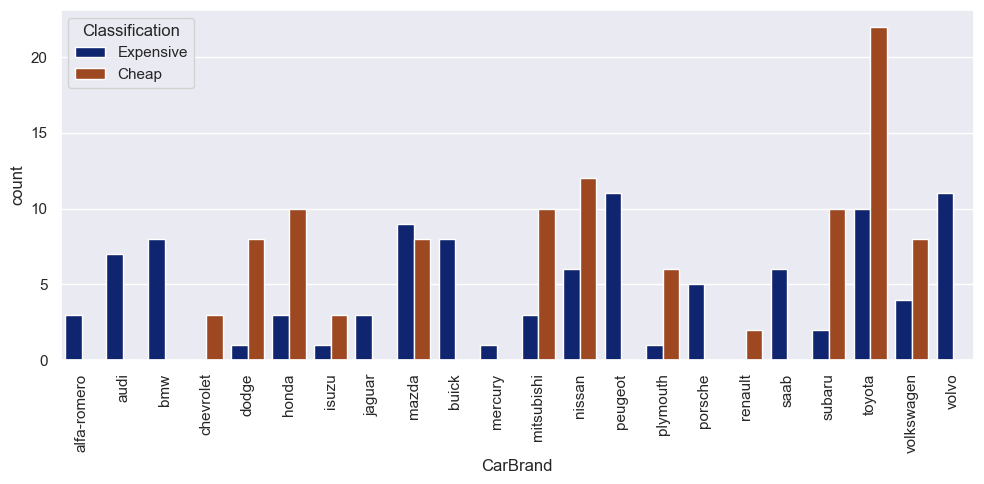

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(df, x="CarBrand", hue="Classification")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("../visualizations/countplot-carbrand.png");

In [18]:
from scipy.stats import skew, kurtosis


skew(df.price) # majority of the data is concentrated towards lower values

1.7646442265113236

In [18]:
kurtosis(df.price) # distribution has higher peak compared to the normal distribution

2.94859776828671



<img src=https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png width=500>


<img src=
https://media.springernature.com/lw685/springer-static/image/art%3A10.3758%2Fs13428-016-0814-1/MediaObjects/13428_2016_814_Fig2_HTML.gif width=600>


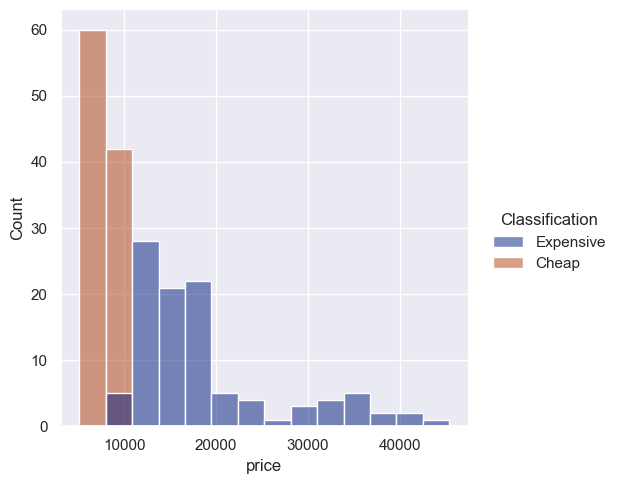

In [19]:
sns.displot(data=df, x="price", hue="Classification")
plt.savefig("../visualizations/hist-price-cars.png")

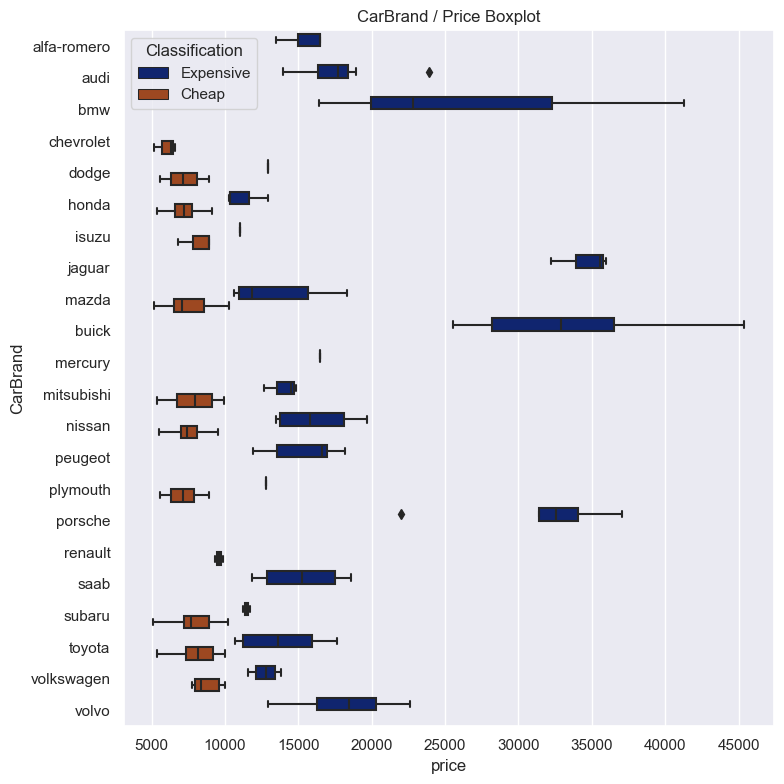

In [21]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df, x="price", y="CarBrand", hue="Classification")
plt.title("CarBrand / Price Boxplot")
plt.tight_layout()
plt.savefig("../visualizations/boxplot-price-carbrand.png")

Saving the dataset in a new file so we don't repeat this steps in the machine learning notebook.

In [22]:
df.to_csv("../processed_data/cars.csv", index=False)

### Correlation between variables

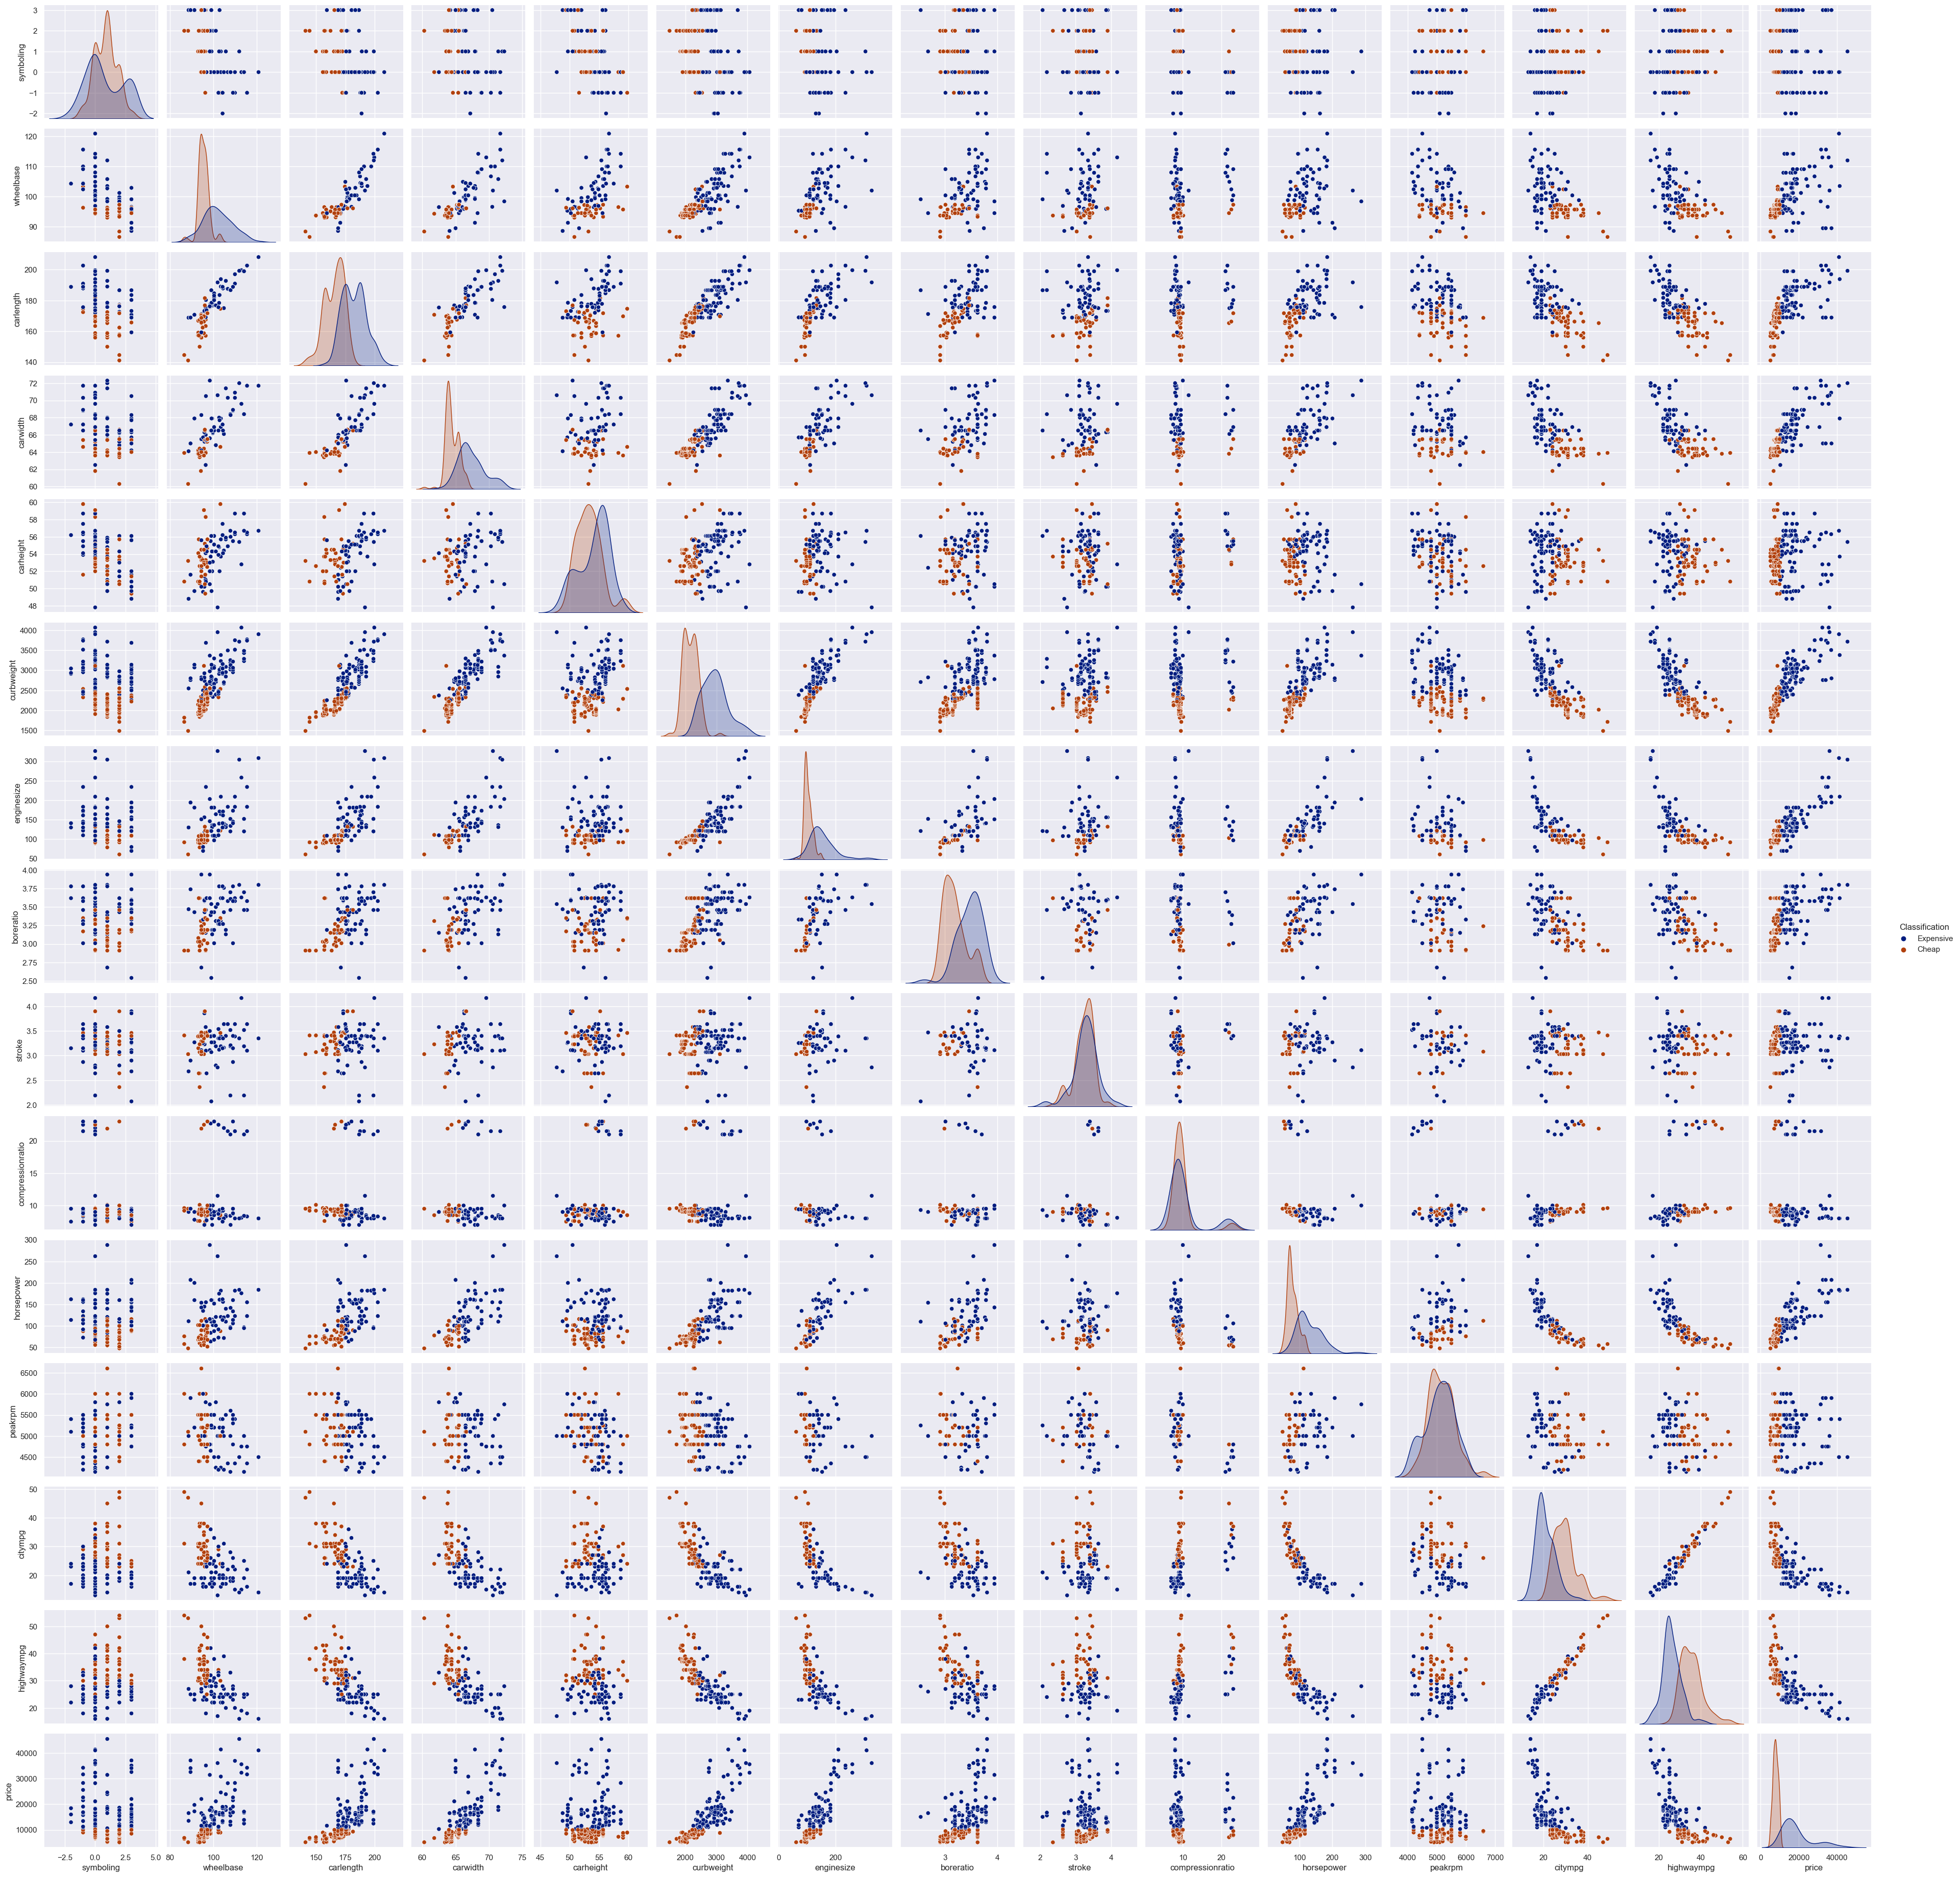

In [24]:
sns.pairplot(data=df,  hue="Classification")
plt.savefig("../visualizations/pairplot-cars.png")

In [25]:
df.corr()

C:\Users\ASUS X515\AppData\Local\Temp\ipykernel_25452\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


symboling  wheelbase  carlength  carwidth  carheight  \
symboling          1.000000  -0.531954  -0.357612 -0.232919  -0.541038   
wheelbase         -0.531954   1.000000   0.874587  0.795144   0.589435   
carlength         -0.357612   0.874587   1.000000  0.841118   0.491029   
carwidth          -0.232919   0.795144   0.841118  1.000000   0.279210   
carheight         -0.541038   0.589435   0.491029  0.279210   1.000000   
curbweight        -0.227691   0.776386   0.877728  0.867032   0.295572   
enginesize        -0.105790   0.569329   0.683360  0.735433   0.067149   
boreratio         -0.130051   0.488750   0.606454  0.559150   0.171071   
stroke            -0.008735   0.160959   0.129533  0.182942  -0.055307   
compressionratio  -0.178515   0.249786   0.158414  0.181129   0.261214   
horsepower         0.070873   0.353294   0.552623  0.640732  -0.108802   
peakrpm            0.273606  -0.360469  -0.287242 -0.220012  -0.320411   
citympg           -0.035823  -0.470414  -0.670909 -0.642704  -0.048640   
highwaympg         0.034606  -0.544082  -0.704662 -0.677218  -0.107358   
price             -0.079978   0.577816   0.682920  0.759325   0.119336   

                  curbweight  enginesize  boreratio    stroke  \
symboling          -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase           0.776386    0.569329   0.488750  0.160959   
carlength           0.877728    0.683360   0.606454  0.129533   
carwidth            0.867032    0.735433   0.559150  0.182942   
carheight           0.295572    0.067149   0.171071 -0.055307   
curbweight          1.000000    0.850594   0.648480  0.168790   
enginesize          0.850594    1.000000   0.583774  0.203129   
boreratio           0.648480    0.583774   1.000000 -0.055909   
stroke              0.168790    0.203129  -0.055909  1.000000   
compressionratio    0.151362    0.028971   0.005197  0.186110   
horsepower          0.750739    0.809769   0.573677  0.080940   
peakrpm            -0.266243   -0.244660  -0.254976 -0.067964   
citympg            -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg         -0.797465   -0.677470  -0.587012 -0.043931   
price               0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbweight         -0.797465  0.835305  
enginesize         -0.677470  0.874145  
boreratio          -0.587012  0.553173  
stroke             -0.043931  0.079443  
compressionratio    0.265201  0.067984  
horsepower         -0.770544  0.808139  
peakrpm            -0.054275 -0.085267  
citympg             0.971337 -0.685751  
highwaympg          1.000000 -0.697599  
price              -0.697599  1.000000

C:\Users\ASUS X515\AppData\Local\Temp\ipykernel_25452\3130803751.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True, annot_kws={"size": 10})


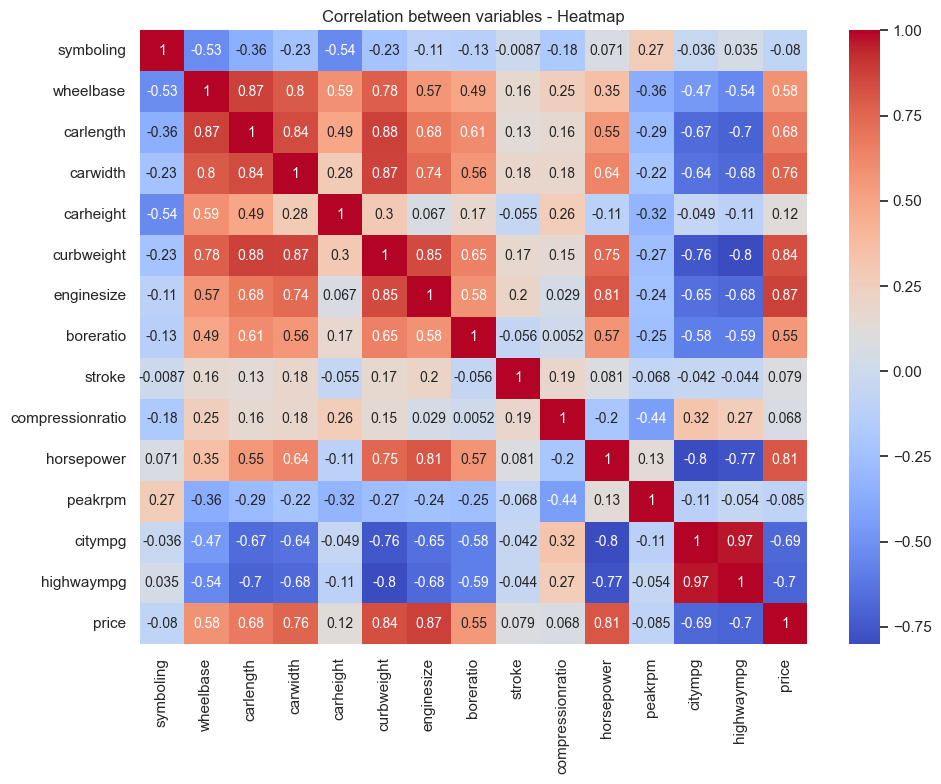

In [26]:
plt.figure(figsize=(10, 8))
plt.title("Correlation between variables - Heatmap")
ax = sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True, annot_kws={"size": 10})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig("../visualizations/corr-cars-heatmap.png");

C:\Users\ASUS X515\AppData\Local\Temp\ipykernel_25452\2271350210.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values(ascending=True).plot(kind='bar')


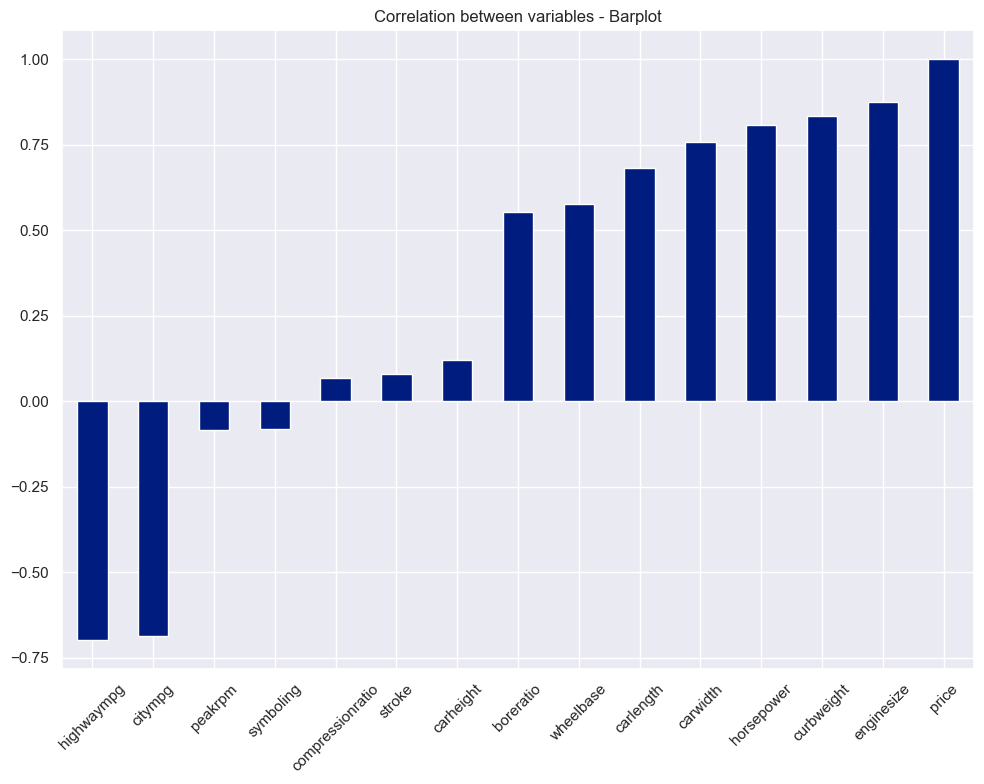

In [27]:
plt.figure(figsize=(10,8))
plt.title("Correlation between variables - Barplot")
df.corr()['price'].sort_values(ascending=True).plot(kind='bar')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.savefig("../visualizations/corr-cars-barplot.png");

## Using Pandas Profiling Library

This dataset has a big amount of variables and that makes it difficult to analyze correlations graphicly. This library will help us to create a more interactive report.

In [69]:
%pip install ydata_profiling

In [67]:
%pip install widgetsnbextension

Note: you may need to restart the kernel to use updated packages.


In [68]:
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [28]:
import ydata_profiling

profile = df.profile_report(title="Pandas Profiling Report")
profile.to_file("../reports/cars-pandas-profiling-report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\ASUS X515\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]